# 1.0 An end-to-end classification problem (ETL)



## 1.1 Dataset description

The notebooks focus on a borrower's **credit modeling problem**. The database was downloaded through a dataquest project and is available at link below. The data is from **Lending Club** and contains data from loans made in the period **2007 to 2011**. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. The **target variable**, or what we are wanting to predict, is whether or not, given a person's history, they will repay the loan.

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

**Some column description**
  - `zip_code`: redundant with the addr_state column since only the first 3 digits of the 5-digit zip code are visible (which can only be used to identify the state the borrower lives in)
  - `out_prncp`: leaks data from the future, (after the loan already started to be paid off)
  - `out_prncp_inv`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_pymnt`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_pymnt_inv`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_rec_prncp`: also leaks data from the future, (after the loan already started to be paid off)
  - `zip_code`: redundant with the addr_state column since only the first 3 digits of the 5-digit zip code are visible (which can only be used to identify the state the borrower lives in)
  - `out_prncp`: leaks data from the future, (after the loan already started to be paid off)
  - `out_prncp_inv`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_pymnt`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_pymnt_inv`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_rec_prncp`: also leaks data from the future, (after the loan already started to be paid off)
  - `total_rec_int`: leaks data from the future, (after the loan has started to be paid off),
  - `total_rec_late_fee`: leaks data from the future, (after the loan has started to be paid off),
  - `recoveries`: leaks data from the future, (after the loan has started to be paid off),
  - `collection_recovery_fee`: leaks data from the future, (after the loan has started to be paid off),
  - `last_pymnt_d`: leaks data from the future, (after the loan has started to be paid off),
  - `last_pymnt_amnt`: leaks data from the future, (after the loan has started to be paid off).

## 1.2 Install and load libraries

In [ ]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 4.3 MB/s 
     |████████████████████████████████| 10.9 MB 37.3 MB/s 
     |████████████████████████████████| 596 kB 53.7 MB/s 
     |████████████████████████████████| 3.1 MB 36.8 MB/s 
     |████████████████████████████████| 102 kB 11.6 MB/s 
     |████████████████████████████████| 690 kB 56.9 MB/s 
     |████████████████████████████████| 303 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 26.5 MB/s 
     |████████████████████████████████| 38.1 MB 63.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=db18caf0b023a01c78d36a12dde57cb5c819473bb10f9def9da76d7ba559451d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=a2ff810cfa4fcda14e77a556ba884e8e9dd5f6684837abd9da719e83a4711c54


In [ ]:
!pip install wandb

In [ ]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os

## 1.3 Exploratory Data Analysis (EDA)

### 1.3.1 Login wandb


In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### 1.3.2 Download raw_data artifact from Wandb

In [ ]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="risk_credit", save_code=True)

wandb: Currently logged in as: morsinaldo (use `wandb login --relogin` to force relogin)


In [ ]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("risk_credit/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,7,13,22,23,25,26,27,28,30,32,33,34,35,36,37,38,39,40,42,44,45,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
columns = df.loc[0,:]
df = pd.read_csv(artifact.file(), names=columns, header = 0, index_col=None)
df = df.drop([0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,7,13,22,23,25,26,27,28,30,32,33,34,35,36,37,38,39,40,42,44,45,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42538 entries, 1 to 42538
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          42538 non-null  object
 1   member_id                   42535 non-null  object
 2   loan_amnt                   42535 non-null  object
 3   funded_amnt                 42535 non-null  object
 4   funded_amnt_inv             42535 non-null  object
 5   term                        42535 non-null  object
 6   int_rate                    42535 non-null  object
 7   installment                 42535 non-null  object
 8   grade                       42535 non-null  object
 9   sub_grade                   42535 non-null  object
 10  emp_title                   39909 non-null  object
 11  emp_length                  41423 non-null  object
 12  home_ownership              42535 non-null  object
 13  annual_inc                  42531 non-null  ob

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42538,42535,42535.0,42535.0,42535.0,42535,42535,42535,42535,42535,...,42535.0,42531,42390.0,42535.0,42535,42506.0,42390.0,42506.0,41170.0,42430.0
unique,42538,42535,1473.0,1785.0,10133.0,2,394,17866,7,35,...,38704.0,108,2.0,2.0,1,3.0,2.0,4.0,6.0,3.0
top,1077501,1296599.0,10000.0,10000.0,5000.0,36 months,10.99%,311.02,B,B3,...,0.0,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
freq,1,1,2105.0,2021.0,778.0,31534,970,54,12389,2997,...,65.0,12492,26007.0,26152.0,42535,26119.0,26007.0,26121.0,23642.0,26046.0


### 1.3.3 Pandas Profilling

In [ ]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Output hidden; open in https://colab.research.google.com to view.

### 1.3.4 EDA Manually

In [ ]:
# There are duplicated rows
df.duplicated().sum()

0

In [ ]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# what the application column can help us?
pd.crosstab(df.loan_status,df.application_type,margins=True,normalize=False)

application_type,INDIVIDUAL,All
loan_status,,
Charged Off,5634,5634
Current,961,961
Default,3,3
Does not meet the credit policy. Status:Charged Off,761,761
Does not meet the credit policy. Status:Fully Paid,1988,1988
Fully Paid,33136,33136
In Grace Period,20,20
Late (16-30 days),8,8
Late (31-120 days),24,24


In [ ]:
# income vs [sex & race]?
pd.crosstab(df.loan_status,df.emp_length,margins=True)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,All
loan_status,,,,,,,,,,,,
Charged Off,456,1333,569,555,462,458,307,263,205,158,640,5406
Current,59,336,81,68,76,73,50,56,37,29,58,923
Default,1,0,0,1,0,0,0,0,0,0,0,2
Does not meet the credit policy. Status:Charged Off,91,156,83,72,56,50,43,32,32,21,110,746
Does not meet the credit policy. Status:Fully Paid,257,314,266,194,149,122,101,68,75,61,362,1969
Fully Paid,2727,7214,3739,3471,2900,2751,1874,1455,1239,1071,3887,32328
In Grace Period,1,6,2,1,3,1,0,1,1,0,2,18
Late (16-30 days),0,1,3,1,0,0,0,0,1,1,1,8
Late (31-120 days),3,9,0,1,3,3,0,0,2,0,2,23


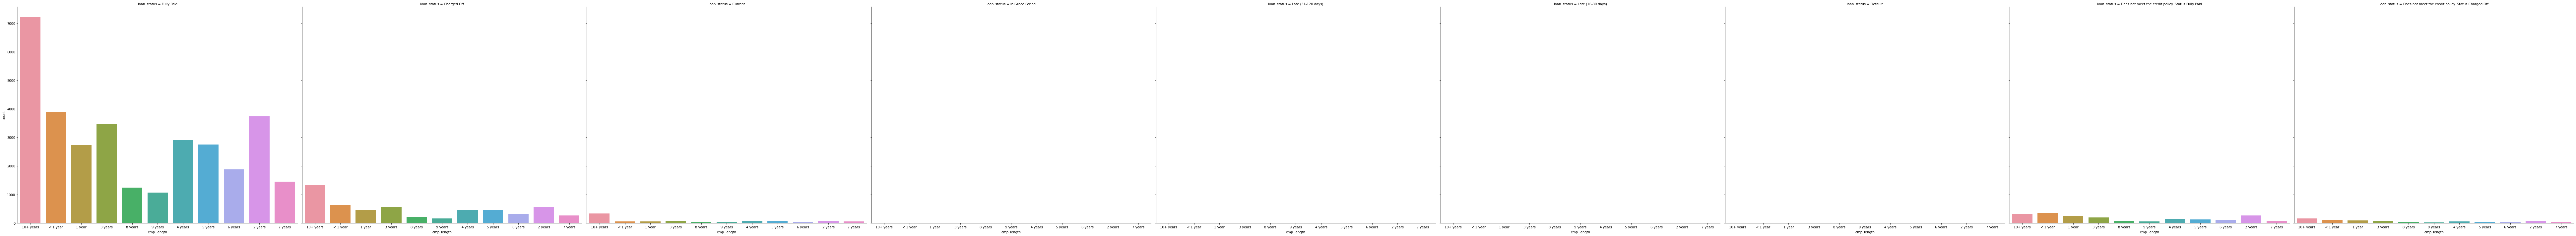

In [ ]:
%matplotlib inline

sns.catplot(x="emp_length",  
            col="loan_status",
            data=df, kind="count",
            height=10, aspect=1.2)
plt.show()

In [ ]:
df.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal           

In [ ]:
run.finish()